In [5]:
import pandas as pd


columns = ['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']


data = pd.read_csv("housing_boston.csv", header=None, names=columns)


print("Assigned Column Names:")
print(data.columns.tolist())
data.head()


Assigned Column Names:
['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']


,,,,,,,,RM,AGE,DIS,RAD,PTRATIO,MEDV
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [6]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())


Missing Values:
RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
MEDV       0
dtype: int64


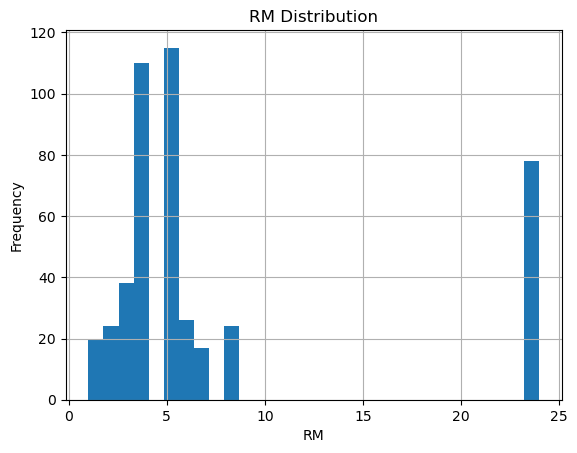

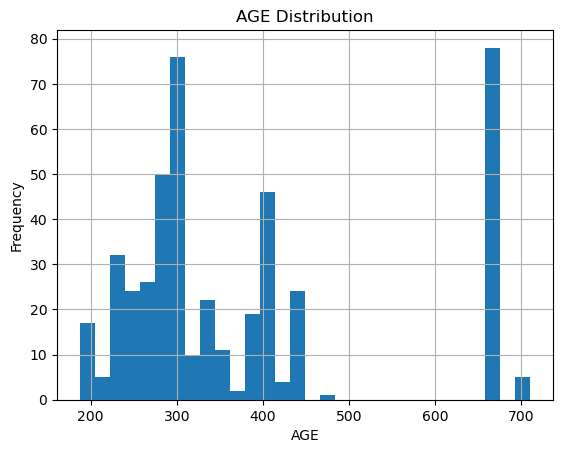

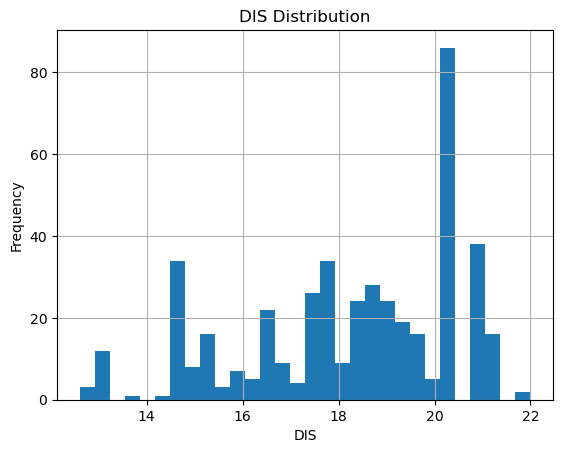

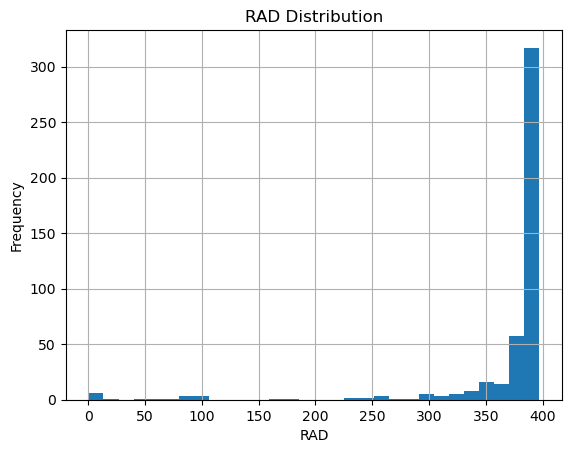

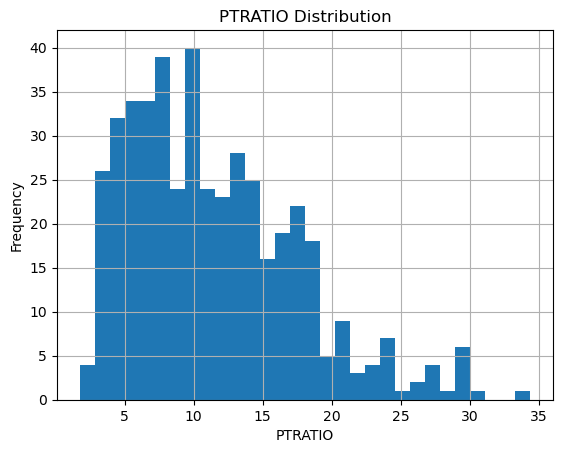

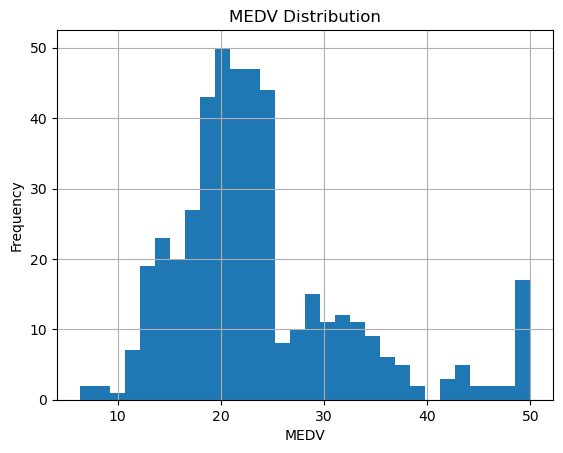

In [7]:
import matplotlib.pyplot as plt

# Plot each column
for col in data.columns:
    plt.figure()
    plt.hist(data[col], bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


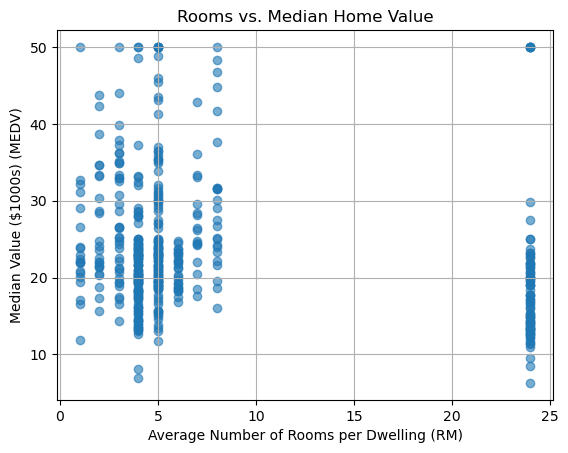

In [8]:
plt.figure()
plt.scatter(data['RM'], data['MEDV'], alpha=0.6)
plt.title("Rooms vs. Median Home Value")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value ($1000s) (MEDV)")
plt.grid(True)
plt.show()


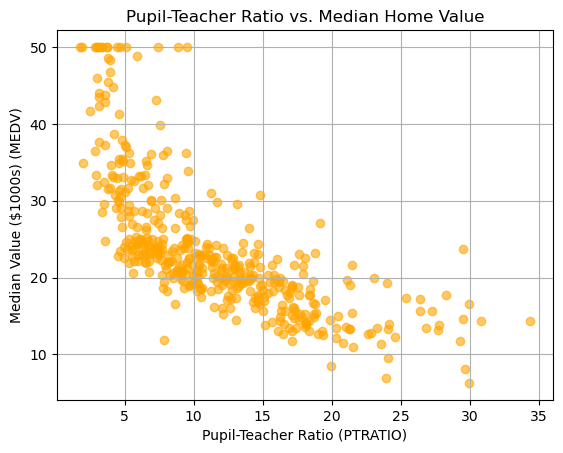

In [9]:
plt.figure()
plt.scatter(data['PTRATIO'], data['MEDV'], alpha=0.6, color='orange')
plt.title("Pupil-Teacher Ratio vs. Median Home Value")
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Median Value ($1000s) (MEDV)")
plt.grid(True)
plt.show()


In [10]:
X = data[['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO']]
y = data['MEDV']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [16]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Baseline R² Score (no depth limit):", r2)



Baseline R² Score (no depth limit): 0.5605457573859443


In [17]:

model_limited = DecisionTreeRegressor(max_depth=4, random_state=42)
model_limited.fit(X_train, y_train)


y_pred_limited = model_limited.predict(X_test)
r2_limited = r2_score(y_test, y_pred_limited)
print("Optimized R² Score (max_depth=4):", r2_limited)


Optimized R² Score (max_depth=4): 0.6886796519570786


In [18]:
new_records = pd.DataFrame([
    [4, 45, 5.7, 2.5, 15],
    [5, 30, 7, 4, 12]
], columns=['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO'])

new_predictions = model.predict(new_records)
print("Predicted MEDV for new records:", new_predictions)


Predicted MEDV for new records: [30.7 31. ]


In [19]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_limited, X, y, cv=10, scoring='r2')
print("10-Fold CV R² Scores (max_depth=4):", cv_scores)
print("Average R² from CV:", cv_scores.mean())



10-Fold CV R² Scores (max_depth=4): [ 0.43351452  0.31340619  0.56006318  0.70911919  0.20968561  0.04232242
  0.28131418 -0.51441033  0.56394083  0.31019819]
Average R² from CV: 0.29091539807718814
